In [980]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

import re

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import datetime
from datetime import datetime, timedelta

import seaborn as sns

In [493]:
# ф-ция для перевода даты в формат %Y-%m-%d
def time_tranform(t):
    dt = datetime.strptime(t, '%m/%d/%Y')
    return dt.strftime('%Y-%m-%d')

# ф-ция для перевода даты в ISO формат
def time_to_iso(t):
    dt = datetime.fromisoformat(t) 
    return int(dt.timestamp())

# ф-ция для очистки данных
def name_update(i):
    if pd.isnull(i):
        return "Unknown"
    i = i.strip("[]")
    i = i.replace("\'", '')
    i = i.split(", ")
    return i

In [ ]:
"""
Загрузим данные
Проведем небольшую предобработку
"""

In [972]:
data = pd.read_csv('main_task.xls',sep=",")
# data.head(5)
# data.info()]

data.columns = ["restaurant_id", "city", "cuisine", "ranking", "rating", "price_range", \
                 "num_of_reviews", "reviews", "url_ta", "id_ta"]

In [ ]:
"""
Фаза 1
"""

In [644]:
# удлаим лишние колонки с текстом
data = data.drop(["restaurant_id", "reviews", "url_ta", "id_ta", "price_range", "cuisine"], axis = 1)
# data = data.drop(["restaurant_id", "reviews", "url_ta", "id_ta", "price_range"], axis = 1)

# добавимм города как dummy
# data = pd.concat([data, cities_dummy], axis=1)
data = data.drop(["city"], axis = 1)

# заполним пропуски данных
# data.num_of_reviews = data.num_of_reviews.fillna(data.num_of_reviews.mean())
data.num_of_reviews = data.num_of_reviews.fillna(0)

data.head()

,ranking,rating,num_of_reviews
0,5570.0,3.5,194.0
1,1537.0,4.0,10.0
2,353.0,4.5,688.0
3,3458.0,5.0,3.0
4,621.0,4.0,84.0


In [645]:
# создадим первую версию модели, проверим метрики

X = data.drop(['rating'], axis = 1)
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

# вычислим основную метрику
print('MAE:', metrics.mean_absolute_error(y_test, y_pred).round(4))

MAE: 0.4242


In [ ]:
"""
Фаза 2
заново загружаем данные
"""

In [992]:
data = pd.read_csv('main_task.xls',sep=",")
# data.head(5)
# data.info()]

data.columns = ["restaurant_id", "city", "cuisine", "ranking", "rating", "price_range", \
                 "num_of_reviews", "reviews", "url_ta", "id_ta"]

In [982]:
data.head()

,restaurant_id,city,cuisine,ranking,rating,price_range,num_of_reviews,reviews,url_ta,id_ta
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [993]:
data[["restaurant_id", "city", "ranking", "rating", "reviews"]].head(20)

,restaurant_id,city,ranking,rating,reviews
0,id_5569,Paris,5570.0,3.5,"[['Good food at your doorstep', 'A good hotel ..."
1,id_1535,Stockholm,1537.0,4.0,"[['Unique cuisine', 'Delicious Nepalese food']..."
2,id_352,London,353.0,4.5,"[['Catch up with friends', 'Not exceptional'],..."
3,id_3456,Berlin,3458.0,5.0,"[[], []]"
4,id_615,Munich,621.0,4.0,"[['Best place to try a Bavarian food', 'Nice b..."
5,id_1418,Oporto,1419.0,3.0,"[['There are better 3 star hotel bars', 'Amazi..."
6,id_1720,Milan,1722.0,4.0,"[['Excellent simple local eatery.', 'Excellent..."
7,id_825,Bratislava,826.0,3.0,"[['Wasting of money', 'excellent cuisine'], ['..."
8,id_2690,Vienna,2692.0,4.0,"[[], []]"
9,id_4209,Rome,4210.0,4.0,"[['Clean efficient staff', 'Nice little pizza ..."


In [961]:
# # удаляем дубликаты
# index = [8421, 39847, 16920, 1579, 22998, 15525, 26431, 4578, 13980, 10439, 10594, 147, 10819, 15295, 22924, \
#         5240, 3942, 13942, 10183, 4732]

# for i in index:
#     data = data.drop(labels=i, axis=0)

In [994]:
# удлаим лишние колонки с текстом
data = data.drop(["restaurant_id", "url_ta", "id_ta"], axis = 1)


# исправим price_range, установим числовые значения
price_range_dict = {"$":1, "$$ - $$$":2, "$$$$":3}
data.price_range = data.price_range.replace(to_replace=price_range_dict)

# заполним пропуски средними значениями
# data.price_range = data.price_range.fillna(data.price_range.mean())
data.price_range = data.price_range.fillna(1)


# добавим даты из revievs. дефолтные установим в 01/01/2015
data['t1'] = ""
data['t2'] = ""
pattern = re.compile('\d\d/\d\d/\d\d\d\d')

for i in range(len(data)):
    s = pattern.findall(data.loc[i].reviews)
    
    if (len(s) == 2):
        data.at[i, 't1'] = s[0]
        data.at[i, 't2'] = s[1]
    else:
        data.at[i, 't1'] = "01/01/2015"
        data.at[i, 't2'] = "01/01/2015"

# преобразуем в дату        
# data['t1'] = pd.to_datetime(data['t1'], format="%m/%d/%Y")
# data['t2'] = pd.to_datetime(data['t2'], format="%m/%d/%Y")
data.t1 = data.t1.apply(time_tranform)
data.t2 = data.t2.apply(time_tranform)

# преобразуем дату в iso
data.t1 = data.t1.apply(time_to_iso)
data.t2 = data.t2.apply(time_to_iso)

# создадим колонку с разницей между комментариями
data['days_diff_t1_t2'] = data['t1'] - data['t2']

In [995]:
# получим список всех кухонь
cols = ["cuisine"]
cuis = data[cols].copy()

cuis['cuisine'] = cuis['cuisine'].apply(name_update)
cuis = cuis.explode("cuisine")

cuisine_list = cuis.cuisine.unique()

# испрвим данные в колонке cuisine
data.cuisine = data.cuisine.apply(name_update)

# добавим общее кол-во кухонь в доп колонку
def cuisine_count(t):
    j=0
    for i in cuisine_list:
        if (i in t):
            j += 1
    return j

data['cuisine_count'] = data.cuisine.apply(cuisine_count)


# заполним пропуски данных в num_of_reviews
# data.num_of_reviews = data.num_of_reviews.fillna(data.num_of_reviews.mean())
data.num_of_reviews = data.num_of_reviews.fillna(0)


# проведем нормализацию данных - нет необходимости для RF
# scaler = StandardScaler()
# data[['ranking', 'price_range', 'num_of_reviews', 'days_diff_t1_t2']] = \
#                        scaler.fit_transform(data[['ranking', 'price_range', 'num_of_reviews', 'days_diff_t1_t2']])

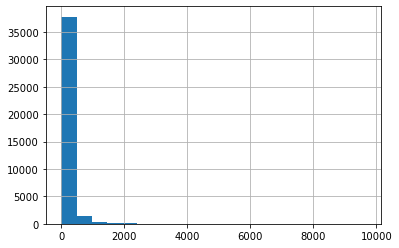

In [1007]:
data.num_of_reviews.hist(bins=20);

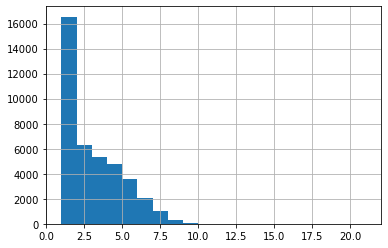

In [1008]:
data.cuisine_count.hist(bins=20);

In [996]:
# введем "Индекс глобальной конкурентоспособности", присвоим его тем заведениям согдасно индекса их страны
# отчет взят за 2018й год, т.к. это максимальный год в нашем DS
# https://gtmarket.ru/files/research/global-competitiveness-index/Global_Competitiveness_Report_2018.pdf

# свяжем названия горовов и страны
city_country_dict = {"Paris": "France", "Stockholm": "Sweden", "London": "United Kingdom", \
                     "Berlin": "Germany", "Munich": "Germany", "Oporto": "Portugal", \
                     "Milan": "Italy", "Bratislava": "Slovakia", "Vienna": "Austria", \
                     "Rome": "Italy", "Barcelona": "Spain", "Madrid": "Spain", \
                     "Dublin": "Ireland", "Brussels": "Belgium", "Zurich": "Switzerland", \
                     "Warsaw": "Poland", "Budapest": "Hungary", "Copenhagen": "Denmark", \
                     "Amsterdam": "Netherlands", "Lyon": "France", "Hamburg": "Germany", \
                     "Lisbon": "Portugal", "Prague": "Czech Republic", "Oslo": "Norway", \
                     "Helsinki": "Finland", "Edinburgh": "United Kingdom", "Geneva": "Switzerland", \
                     "Ljubljana": "Slovenia", "Athens": "Greece", "Luxembourg": "Luxembourg", "Krakow": "Poland"}
data['country'] = data.city.replace(to_replace=city_country_dict)

# свяжем страны с индексом
global_competitiveness_dict = {"France": 78.0, "Sweden": 87.7, "United Kingdom": 82.0, "Germany": 82.8, \
                               "Portugal": 70.2, "Italy": 70.8, "Slovakia": 66.8, "Austria": 76.3, \
                               "Spain": 74.2, "Ireland": 75.7, "Belgium": 76.6, "Switzerland": 82.6, \
                               "Poland": 68.2, "Hungary": 64.3, "Denmark": 80.6, "Netherlands": 82.4, \
                               "Czech Republic": 71.2, "Norway": 78.2, "Finland": 80.3, \
                               "Slovenia": 69.6, "Greece": 62.1, "Luxembourg": 76.6}
data['country'] = data.country.replace(to_replace=global_competitiveness_dict)

In [997]:
# создадим несколько фич
# data['f1'] = data.price_range / data.ranking
# data['f2'] = data.ranking / data.num_of_reviews
# data['f4'] = data.t1 / data.ranking
# data['f5'] = data.t2 / data.ranking
# data['f6'] = data.days_diff_t1_t2 / data.ranking

# data['f7'] = data.ranking / data.cuisine_count

data['f8'] = data.ranking + data.country

In [998]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             40000 non-null  object 
 1   cuisine          40000 non-null  object 
 2   ranking          40000 non-null  float64
 3   rating           40000 non-null  float64
 4   price_range      40000 non-null  float64
 5   num_of_reviews   40000 non-null  float64
 6   reviews          40000 non-null  object 
 7   t1               40000 non-null  int64  
 8   t2               40000 non-null  int64  
 9   days_diff_t1_t2  40000 non-null  int64  
 10  cuisine_count    40000 non-null  int64  
 11  country          40000 non-null  float64
 12  f8               40000 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 4.0+ MB


In [999]:
corr = data.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ranking,rating,price_range,num_of_reviews,t1,t2,days_diff_t1_t2,cuisine_count,country,f8
ranking,1.00,-0.37,-0.22,-0.22,-0.22,-0.23,0.06,-0.32,0.24,1.00
rating,-0.37,1.00,0.03,0.03,0.06,0.07,-0.04,0.12,-0.03,-0.37
price_range,-0.22,0.03,1.00,0.30,0.42,0.42,-0.04,0.48,0.05,-0.22
num_of_reviews,-0.22,0.03,0.30,1.00,0.30,0.32,-0.08,0.41,-0.05,-0.22
t1,-0.22,0.06,0.42,0.30,1.00,0.91,0.13,0.49,0.10,-0.22
t2,-0.23,0.07,0.42,0.32,0.91,1.00,-0.30,0.52,0.09,-0.23
days_diff_t1_t2,0.06,-0.04,-0.04,-0.08,0.13,-0.30,1.00,-0.12,0.01,0.06
cuisine_count,-0.32,0.12,0.48,0.41,0.49,0.52,-0.12,1.00,-0.02,-0.32
country,0.24,-0.03,0.05,-0.05,0.10,0.09,0.01,-0.02,1.00,0.24
f8,1.00,-0.37,-0.22,-0.22,-0.22,-0.23,0.06,-0.32,0.24,1.00


In [1000]:
# t2 можно удалить, сильно коррелирует с t1
# f8 так-же 
data = data.drop(['t2', 'f8'], axis = 1)

In [1001]:
# добавимм города как dummy
data = pd.concat([data, cities_dummy], axis=1)
data = data.drop(["city"], axis = 1)

In [1003]:
# удлаим лишние колонки с текстом
# data = data.drop(["cuisine", "reviews", "days_diff_t1_t2", "t1", "t2"], axis = 1)

# data = data.drop(["cuisine", "reviews"], axis = 1)
data = data.drop(["cuisine", "reviews"], axis = 1)

In [853]:
# data = data.drop(["f8"], axis = 1)

In [1004]:
# создадим вторую версию модели, проверим метрики

X = data.drop(['rating'], axis = 1)
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

# вычислим основную метрику
print('MAE:', metrics.mean_absolute_error(y_test, y_pred).round(4))

MAE: 0.2069


In [1005]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ranking          40000 non-null  float64
 1   rating           40000 non-null  float64
 2   price_range      40000 non-null  float64
 3   num_of_reviews   40000 non-null  float64
 4   t1               40000 non-null  int64  
 5   days_diff_t1_t2  40000 non-null  int64  
 6   cuisine_count    40000 non-null  int64  
 7   country          40000 non-null  float64
 8   Athens           40000 non-null  uint8  
 9   Barcelona        40000 non-null  uint8  
 10  Berlin           40000 non-null  uint8  
 11  Bratislava       40000 non-null  uint8  
 12  Brussels         40000 non-null  uint8  
 13  Budapest         40000 non-null  uint8  
 14  Copenhagen       40000 non-null  uint8  
 15  Dublin           40000 non-null  uint8  
 16  Edinburgh        40000 non-null  uint8  
 17  Geneva      